<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/mobile2.png?raw=true" width=800 align="left"/>

# 실습 내용

- 다양한 알고리즘으로 모델을 만들고 성능을 예측합니다.
- 성능이 좋을 것으로 판단된 모델의 성능을 튜닝합니다.
- 튜닝된 모델의 성능을 평가합니다.

성능은 cross_val 함수 이용해서 해보기!

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [12]:
# 데이터 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/mobile_cust_churn.csv'
data = pd.read_csv(path)
data['CHURN'] = data['CHURN'].map({'STAY':0, 'LEAVE': 1})  # sklearn 모델이 아닌 경우는 문자열 쓰면 안되서 바꿈

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [4]:
# 데이터 살펴보기
data.head()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,0,31953,0,6,313378,161,0,4,unsat,little,no,0
1,2,1,36147,0,13,800586,244,0,6,unsat,little,considering,0
2,3,1,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,0
3,4,0,120070,38,33,788235,780,3,2,unsat,very_high,considering,1
4,5,1,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,0


**데이터 설명**

- COLLEGE: 대학 졸업여부
- INCOME: 연수입
- OVERAGE: 월평균 초과사용 시간(분)
- LEFTOVER: 월평균 잔여시간비율(%)
- HOUSE: 집값
- HANDSET_PRICE: 스마트폰 가격
- OVER_15MINS_CALLS_PER_MONTH: 월평균 장기통화(15분이상) 횟수
- AVERAGE_CALL_DURATION: 평균 통화 시간
- REPORTED_SATISFACTION: 만족도 설문조사 결과
- REPORTED_USAGE_LEVEL: 사용도 자가진단 결과
- CONSIDERING_CHANGE_OF_PLAN: 향후 변경계획 설문조사 결과
- CHURN: 이탈(번호이동) 여부

In [5]:
# 기술통계 확인
data.describe()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,CHURN
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,0.502400,80281.447750,85.979550,23.898650,493155.264250,389.615100,8.000700,6.002250,0.492600
std,5773.647028,0.500007,41680.586319,85.992324,26.816645,252407.884692,213.820682,8.925418,4.402558,0.499958
min,1.000000,0.000000,20007.000000,-2.000000,0.000000,150002.000000,130.000000,0.000000,1.000000,0.000000
25%,5000.750000,0.000000,42217.000000,0.000000,0.000000,263714.250000,219.000000,1.000000,2.000000,0.000000
50%,10000.500000,1.000000,75366.500000,59.000000,14.000000,452259.500000,326.000000,4.000000,5.000000,0.000000
75%,15000.250000,1.000000,115881.750000,179.000000,41.000000,702378.000000,533.250000,15.000000,10.000000,1.000000
max,20000.000000,1.000000,159983.000000,335.000000,89.000000,999996.000000,899.000000,29.000000,15.000000,1.000000


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 변수 제거**

In [13]:
# 변수 제거
data.drop('id', axis=1, inplace=True)

# 확인
data.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,0,31953,0,6,313378,161,0,4,unsat,little,no,0
1,1,36147,0,13,800586,244,0,6,unsat,little,considering,0
2,1,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,0
3,0,120070,38,33,788235,780,3,2,unsat,very_high,considering,1
4,1,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,0


**2) x, y 분리**

In [14]:
# Target 설정
target = 'CHURN'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:,target]

**3) 가변수화**

In [15]:
# 가변수화 대상: REPORTED_SATISFACTION, REPORTED_USAGE_LEVEL, CONSIDERING_CHANGE_OF_PLAN
dummy_cols = ['REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN']

# 가변수화
x = pd.get_dummies(x, columns=dummy_cols, drop_first=True)

# 확인
list(x)

['COLLEGE',
 'INCOME',
 'OVERAGE',
 'LEFTOVER',
 'HOUSE',
 'HANDSET_PRICE',
 'OVER_15MINS_CALLS_PER_MONTH',
 'AVERAGE_CALL_DURATION',
 'REPORTED_SATISFACTION_sat',
 'REPORTED_SATISFACTION_unsat',
 'REPORTED_SATISFACTION_very_sat',
 'REPORTED_SATISFACTION_very_unsat',
 'REPORTED_USAGE_LEVEL_high',
 'REPORTED_USAGE_LEVEL_little',
 'REPORTED_USAGE_LEVEL_very_high',
 'REPORTED_USAGE_LEVEL_very_little',
 'CONSIDERING_CHANGE_OF_PLAN_considering',
 'CONSIDERING_CHANGE_OF_PLAN_never_thought',
 'CONSIDERING_CHANGE_OF_PLAN_no',
 'CONSIDERING_CHANGE_OF_PLAN_perhaps']

: get_dummies()는 fit(), transform() 함수가 없음

**4) 학습용, 평가용 데이터 분리**

In [16]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.3, random_state=1)

**5) 정규화**

In [17]:
# 모듈 불러오기
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

# 4.성능 예측

- 여러 알고리즘으로 모델을 만들고 K-Fold CV로 성능을 예측합니다.
- 하이퍼파라미터를 설정하지 않고 진행합니다.
- 각 모델의 성능 정보를 수집해 마지막에 비교합니다.

In [ ]:
# xgboost 설치
# pip install xgboost

In [ ]:
# lightgbm 설치
# pip install lightgbm

- 이후 사용할 함수를 모두 불러옵니다.

In [118]:
# 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report

**1) KNN**

- KNN 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [84]:
# 선언하기
KNN = KNeighborsClassifier()

In [85]:
# 성능예측
cv_score = cross_val_score(KNN, x_train, y_train, cv=5)

In [86]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[0.57       0.58666667 0.5725     0.59416667 0.57666667]
0.58


In [87]:
# 결과수집
result = {}
result['KNN'] = cv_score.mean()
result

{'KNN': 0.58}

**2) Decision Tree**

- Decision Tree 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [88]:
# 선언하기
DT = DecisionTreeClassifier(random_state=1)

In [89]:
# 성능예측
cv_score = cross_val_score(DT, x_train, y_train)

In [90]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[0.61333333 0.6225     0.62       0.65833333 0.61      ]
0.6248333333333334


In [91]:
# 결과수집
result['Decision Tree'] = round(cv_score.mean(),2)
result

{'KNN': 0.58, 'Decision Tree': 0.62}

**3) Logistic Regression**

- Logistic Regression 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [92]:
# 선언하기
Logi = LogisticRegression()

In [93]:
# 성능예측
cv_score = cross_val_score(Logi , x_train, y_train)

In [94]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[0.64166667 0.64833333 0.62166667 0.66083333 0.61666667]
0.6378333333333333


In [95]:
# 결과수집
result['Logistic Regression'] = round(cv_score.mean(), 2)
result

{'KNN': 0.58, 'Decision Tree': 0.62, 'Logistic Regression': 0.64}

**4) Random Forest**

- Random Forest 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [96]:
# 선언하기
RF = RandomForestClassifier(random_state=1)

In [97]:
# 성능예측
cv_score = cross_val_score(RF , x_train, y_train)

In [98]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[0.69833333 0.7        0.67333333 0.6875     0.68916667]
0.6896666666666667


In [99]:
# 결과수집
result['Random Forest'] = round(cv_score.mean(),2)
result

{'KNN': 0.58,
 'Decision Tree': 0.62,
 'Logistic Regression': 0.64,
 'Random Forest': 0.69}

**5) XGBoost**

- XGBoost 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [100]:
# 선언하기
XGB = XGBClassifier(random_state=1)

In [101]:
# 성능예측
cv_score = cross_val_score(XGB , x_train, y_train)

In [102]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[0.69166667 0.68       0.66       0.65666667 0.685     ]
0.6746666666666667


In [103]:
# 결과수집
result['XGBoost'] = round(cv_score.mean(), 2)
result

{'KNN': 0.58,
 'Decision Tree': 0.62,
 'Logistic Regression': 0.64,
 'Random Forest': 0.69,
 'XGBoost': 0.67}

**6) LightGBM**

- LightGBM 알고리즘으로 모델링하고 K-Fold CV로 성능을 검증합니다.

In [104]:
# 선언하기
LGB = LGBMClassifier(random_state=1, verbose=-100)

In [105]:
# 성능예측
cv_score = cross_val_score(LGB , x_train, y_train)

In [106]:
# 결과확인
print(cv_score)
print(cv_score.mean())

[0.68666667 0.69666667 0.67416667 0.685      0.70666667]
0.6898333333333333


In [107]:
# 결과수집
result['LightGBM'] = round(cv_score.mean(), 2)
result

{'KNN': 0.58,
 'Decision Tree': 0.62,
 'Logistic Regression': 0.64,
 'Random Forest': 0.69,
 'XGBoost': 0.67,
 'LightGBM': 0.69}

# 5.결과 확인

- 예측된 각 모델의 성능을 비교합니다.

In [108]:
# 성능 비교
print('=' * 40)
for m_name, score in result.items():
    print(m_name, score.round(3))
print('=' * 40)

KNN 0.58
Decision Tree 0.62
Logistic Regression 0.64
Random Forest 0.69
XGBoost 0.67
LightGBM 0.69


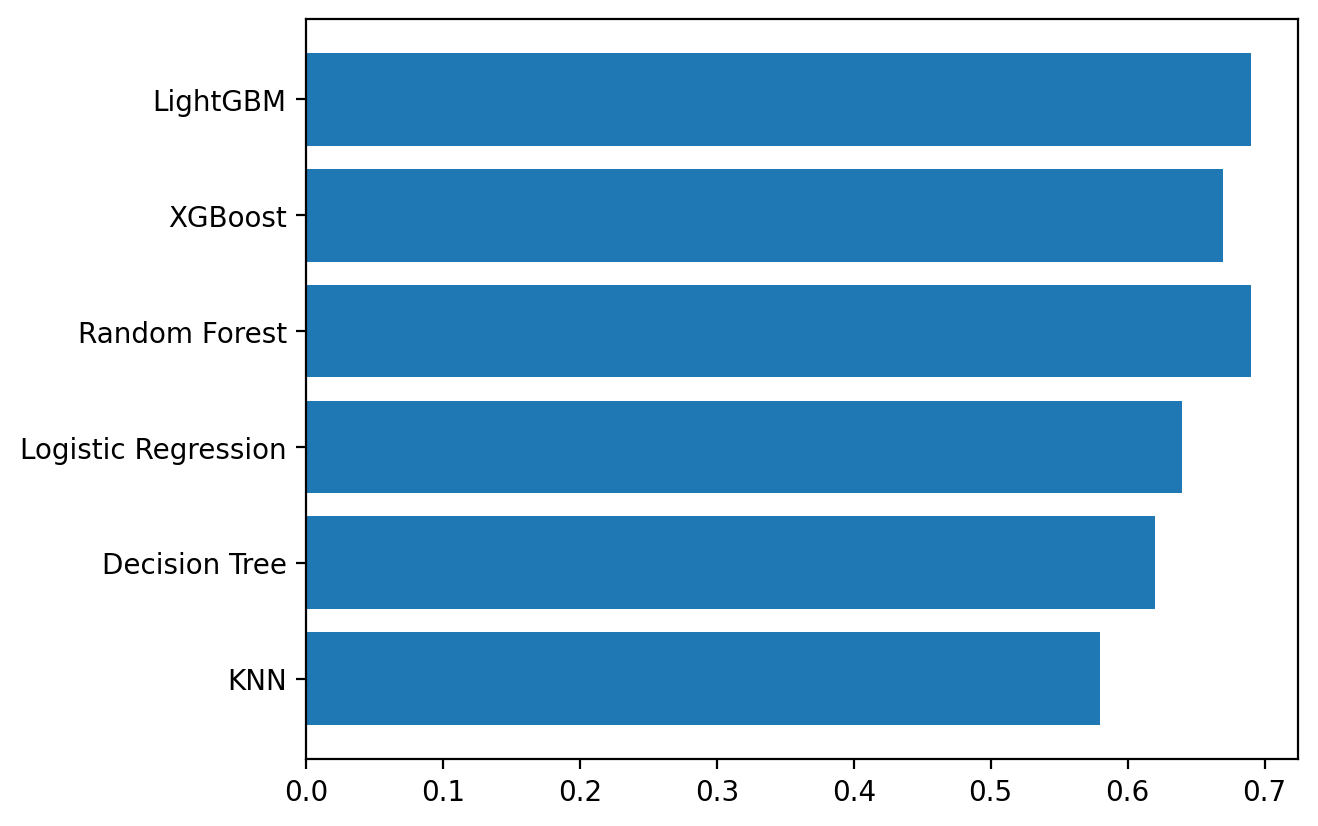

In [116]:
# 성능 시각화 비교
plt.barh(list(result.keys()), result.values())
plt.show()

# 6.성능 튜닝

- 위에서 성능이 가장 좋을 것으로 예측된 모델을 튜닝합니다.
- 본 실습에서는 LightGBM 모델 성능을 튜닝합니다.

In [124]:
# 파라미터 지정
  # max_depth: range(1, 21)
params = {
    'max_depth' : range(1, 21)
}

# 모델 선언
model = GridSearchCV(LGBMClassifier(),
                    params,
                    cv=5)

In [125]:
# 학습하기(많은 시간이 소요될 수 있음)
model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 2368, number of negative: 2432
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000632 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 4800, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493333 -> initscore=-0.026668
[LightGBM] [Info] Start training from score -0.026668
[LightGBM] [Info] Number of positive: 2368, number of negative: 2432
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000480 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1129
[LightGBM] [Info] Number of data points in the train set: 4800, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493333 -> initscore=-0.026668
[LightGBM] [Info] Start training from score -0.026668
[LightGBM] [

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'max_depth': range(1, 21)})

In [126]:
# 최적 파라미터, 예측 최고 성능
print('=' * 80)
print(model.cv_results_['mean_test_score'])
print('-' * 80)
print('최적파라미터:', model.best_params_)
print('-' * 80)
print('최고성능:', model.best_score_)
print('=' * 80)

[0.6715     0.69566667 0.69566667 0.6945     0.68933333 0.69183333
 0.691      0.68733333 0.69033333 0.68933333 0.69083333 0.68933333
 0.68716667 0.68866667 0.68766667 0.689      0.6905     0.68983333
 0.68983333 0.68983333]
--------------------------------------------------------------------------------
최적파라미터: {'max_depth': 2}
--------------------------------------------------------------------------------
최고성능: 0.6956666666666667


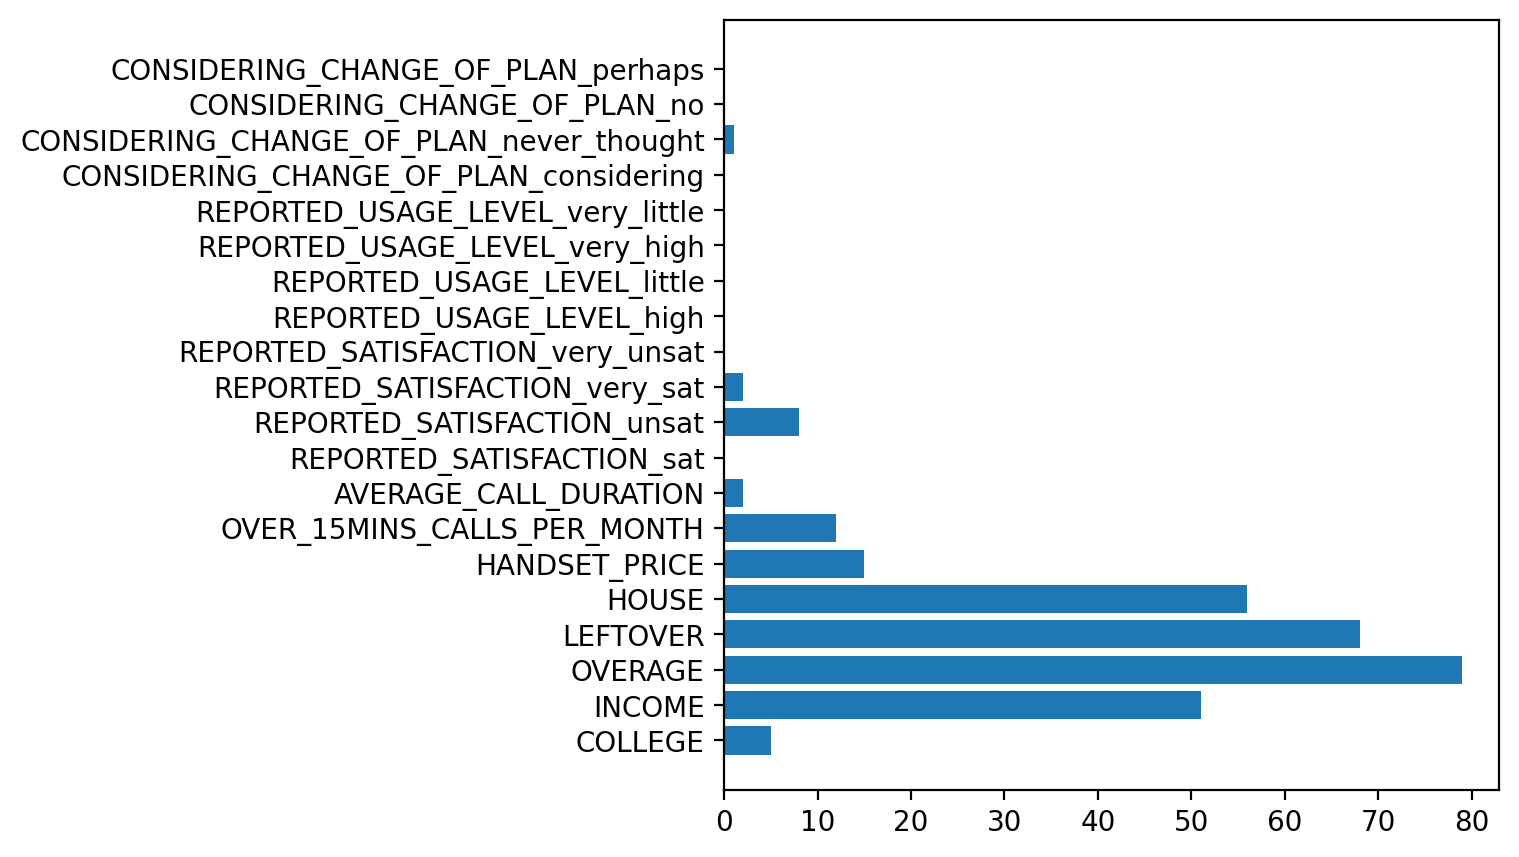

In [127]:
# 변수 중요도 시각화
plt.figure(figsize=(5, 5))
plt.barh(y=list(x), width=model.best_estimator_.feature_importances_) # 최선의 DT : model.best_estimator_
plt.show()

# 7.성능 평가

- 최적 파라미터로 학습된 모델에 대해 최종 성능 평가를 진행합니다.

In [128]:
# 예측하기
y_pred = model.predict(x_test)

In [129]:
# 성능평가
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4782 2326]
 [2122 4770]]
              precision    recall  f1-score   support

           0       0.69      0.67      0.68      7108
           1       0.67      0.69      0.68      6892

    accuracy                           0.68     14000
   macro avg       0.68      0.68      0.68     14000
weighted avg       0.68      0.68      0.68     14000

